In [1]:
import matplotlib.pyplot as plt

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize

import pandas as pd

In [2]:
#Importation texte:
fichier = open(r"C:\Users\hadrien\Documents\Personnel\formation data\Projet\livre eng\The-Lord-of-the-Rings-Illustrated-Ed...-Z-Library.txt", 'r', encoding='utf-8')


nombre_lignes_voulues = 24000
texte = ""
for i in range(nombre_lignes_voulues):
    ligne = fichier.readline()
    if not ligne:
        break
    texte += ligne


fichier.close()


In [3]:
#Test analyse de sentient pour un personnage (Frodo):


nltk.download('vader_lexicon')
nltk.download('punkt')

sid = SentimentIntensityAnalyzer()
personnage = "Frodo"
sentiments_frodo = []

sentences = nltk.sent_tokenize(texte)

for sentence in sentences:
    if personnage in sentence:
        sentiment = sid.polarity_scores(sentence)['compound']
        sentiments_frodo.append(sentiment)


score_global_frodo = sum(sentiments_frodo) / len(sentiments_frodo)

print("Analyse de sentiments pour Frodo dans le livre :")
print("Score global:", score_global_frodo)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hadrien\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hadrien\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Analyse de sentiments pour Frodo dans le livre :
Score global: 0.02899849974133465


In [4]:
#test sur plusieurs personnages:

# Liste des personnages à analyser
personnages = ["Frodo", "Gandalf", "Sam", "Aragorn", "Gimli","Legolas", "Saruman", "Orcs"]

sentences = nltk.sent_tokenize(texte)

df = pd.DataFrame(columns=['Nom', 'Score'])

for personnage in personnages:
    sentiments_personnage = []
    for sentence in sentences:
        if personnage in sentence:
            sentiment = sid.polarity_scores(sentence)['compound']
            sentiments_personnage.append(sentiment)

  
    score_global_personnage = sum(sentiments_personnage) / len(sentiments_personnage)

  
    df = df.append({'Nom': personnage, 'Score': score_global_personnage}, ignore_index=True)

print(df)

C:\Users\hadrien\AppData\Local\Temp\ipykernel_9044\1598310786.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Nom': personnage, 'Score': score_global_personnage}, ignore_index=True)
C:\Users\hadrien\AppData\Local\Temp\ipykernel_9044\1598310786.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Nom': personnage, 'Score': score_global_personnage}, ignore_index=True)
C:\Users\hadrien\AppData\Local\Temp\ipykernel_9044\1598310786.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Nom': personnage, 'Score': score_global_personnage}, ignore_index=True)
C:\Users\hadrien\AppData\Local\Temp\ipykernel_9044\1598310786.py:21: FutureWarning: The frame.append method is deprecated

       Nom     Score
0    Frodo  0.028998
1  Gandalf  0.052166
2      Sam -0.006818
3  Aragorn  0.028213
4    Gimli  0.022091
5  Legolas  0.021246
6  Saruman -0.037569
7     Orcs -0.070411


C:\Users\hadrien\AppData\Local\Temp\ipykernel_9044\1598310786.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Nom': personnage, 'Score': score_global_personnage}, ignore_index=True)
C:\Users\hadrien\AppData\Local\Temp\ipykernel_9044\1598310786.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Nom': personnage, 'Score': score_global_personnage}, ignore_index=True)
C:\Users\hadrien\AppData\Local\Temp\ipykernel_9044\1598310786.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Nom': personnage, 'Score': score_global_personnage}, ignore_index=True)
C:\Users\hadrien\AppData\Local\Temp\ipykernel_9044\1598310786.py:21: FutureWarning: The frame.append method is deprecated

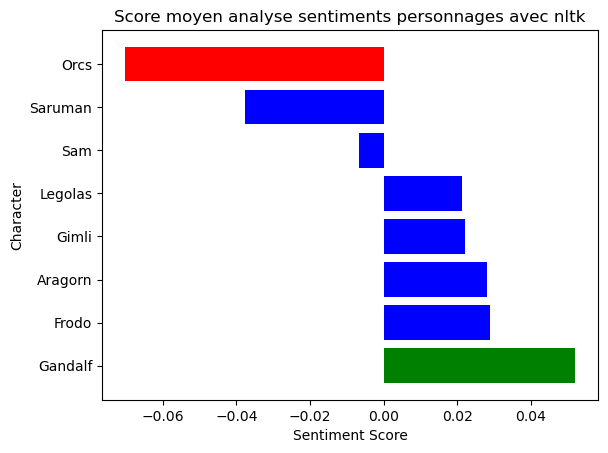

In [5]:
# faire un graphique des scores moyen d'analyse de sentiments:
def categorize_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Score'].apply(categorize_sentiment)

df = df.sort_values(by='Score', ascending=False)

plt.barh(df['Nom'], df['Score'], color=df['Sentiment'].map({'Positive': 'g', 'Negative': 'r', 'Neutral': 'b'}))

plt.xlabel('Sentiment Score')
plt.ylabel('Character')
plt.title('Score moyen analyse sentiments personnages avec nltk')

plt.show()

C:\Users\hadrien\AppData\Local\Temp\ipykernel_9044\4103254999.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append({'Nom': personnage, 'Positif': positive_percentage, 'Negatif': negative_percentage, 'Neutre': neutral_percentage}, ignore_index=True)
C:\Users\hadrien\AppData\Local\Temp\ipykernel_9044\4103254999.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append({'Nom': personnage, 'Positif': positive_percentage, 'Negatif': negative_percentage, 'Neutre': neutral_percentage}, ignore_index=True)
C:\Users\hadrien\AppData\Local\Temp\ipykernel_9044\4103254999.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append({'Nom': personnage, 'Positif': positive_percentage, 'Negatif': negati

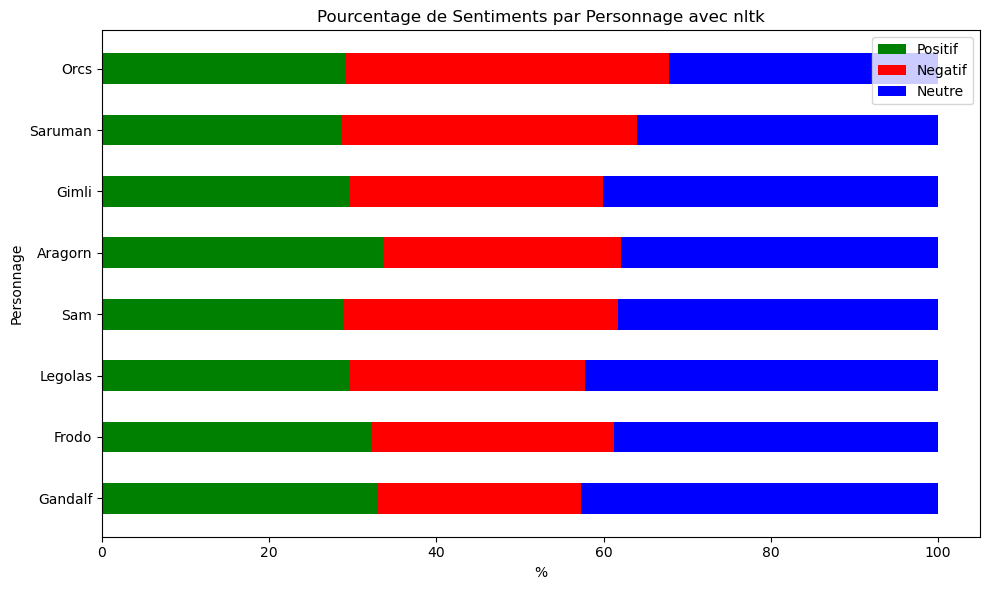

In [6]:
# graphe avec % des sentiments avec nltk:
df1 = pd.DataFrame(columns=['Nom', 'Positif', 'Negatif', 'Neutre'])


for personnage in personnages:
    positive_count = 0
    negative_count = 0
    neutral_count = 0
    total_count = 0
    for sentence in sentences:
        if personnage in sentence:
            sentiment = sid.polarity_scores(sentence)['compound']
            if sentiment >= 0.05:
                positive_count += 1
            elif sentiment <= -0.05:
                negative_count += 1
            else:
                neutral_count += 1
            total_count += 1

    
    if total_count > 0:
        positive_percentage = (positive_count / total_count) * 100
        negative_percentage = (negative_count / total_count) * 100
        neutral_percentage = (neutral_count / total_count) * 100
    else:
        positive_percentage = 0
        negative_percentage = 0
        neutral_percentage = 0

   
    df1 = df1.append({'Nom': personnage, 'Positif': positive_percentage, 'Negatif': negative_percentage, 'Neutre': neutral_percentage}, ignore_index=True)

#le graphique:   
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.5
bar_positions = df.index

ax.barh(bar_positions, df1['Positif'], height=bar_width, label='Positif', color='green')
ax.barh(bar_positions, df1['Negatif'], height=bar_width, left=df1['Positif'], label='Negatif', color='red')
ax.barh(bar_positions, df1['Neutre'], height=bar_width, left=df1['Positif'] + df1['Negatif'], label='Neutre', color='blue')

ax.set_xlabel('%')
ax.set_ylabel('Personnage')
ax.set_title('Pourcentage de Sentiments par Personnage avec nltk')
ax.set_yticks(bar_positions)
ax.set_yticklabels(df1['Nom'])
ax.legend()

plt.tight_layout()
plt.show()    

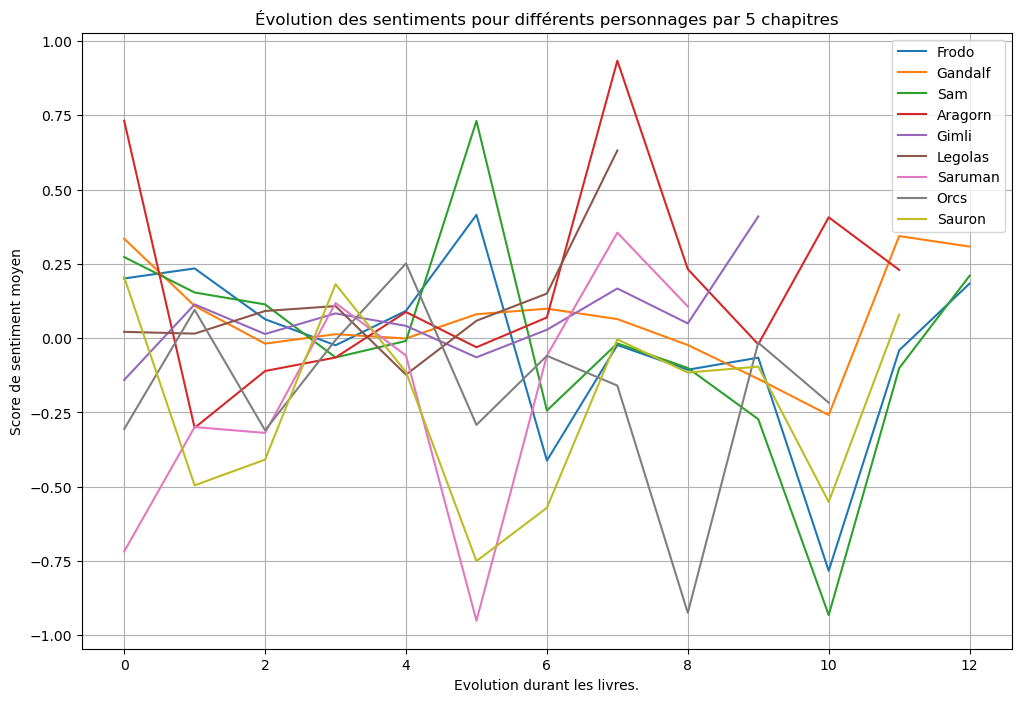

In [7]:
#graphique évolution des entiemnts durant les livres:
def calculate_average_sentiment(character, chapter_text, sia):
    character_occurrences = [sentence for sentence in chapter_text if character in sentence]
    if not character_occurrences:
        return None

    sentiment_scores = [sia.polarity_scores(sentence)["compound"] for sentence in character_occurrences]
    average_sentiment = sum(sentiment_scores) / len(sentiment_scores)
    return average_sentiment

def split_text_into_chapters(text, chapter_pattern):
    chapters = []
    current_chapter = []

    for line in text.split('\n'):
        if chapter_pattern in line:
            if current_chapter:
                chapters.append('\n'.join(current_chapter))
            current_chapter = [line]
        else:
            current_chapter.append(line)

    if current_chapter:
        chapters.append('\n'.join(current_chapter))

    return chapters



sia = SentimentIntensityAnalyzer()


chapter_pattern = "Chapter"
chapters = split_text_into_chapters(texte[3110:], chapter_pattern)

characters = ["Frodo", "Gandalf", "Sam", "Aragorn", "Gimli", "Legolas", "Saruman", "Orcs", "Sauron"]

plt.figure(figsize=(12, 8))

grouped_chapters = 5
num_groups = (len(chapters) + grouped_chapters - 1) // grouped_chapters

for character in characters:
    character_avg_sentiments = []

    for i in range(num_groups):
        start_chapter = i * grouped_chapters
        end_chapter = min((i + 1) * grouped_chapters, len(chapters))

        group_chapters = chapters[start_chapter:end_chapter]
        group_sentiments = [calculate_average_sentiment(character, chapter.split('\n'), sia) for chapter in group_chapters]

        
        valid_sentiments = [sentiment for sentiment in group_sentiments if sentiment is not None]

        if valid_sentiments:
            avg_group_sentiment = sum(valid_sentiments) / len(valid_sentiments)
            character_avg_sentiments.append(avg_group_sentiment)

    plt.plot(character_avg_sentiments, label=character)

plt.title("Évolution des sentiments pour différents personnages par 5 chapitres")
plt.xlabel("Evolution durant les livres.")
plt.ylabel("Score de sentiment moyen")
plt.grid(True)
plt.legend()
plt.show()

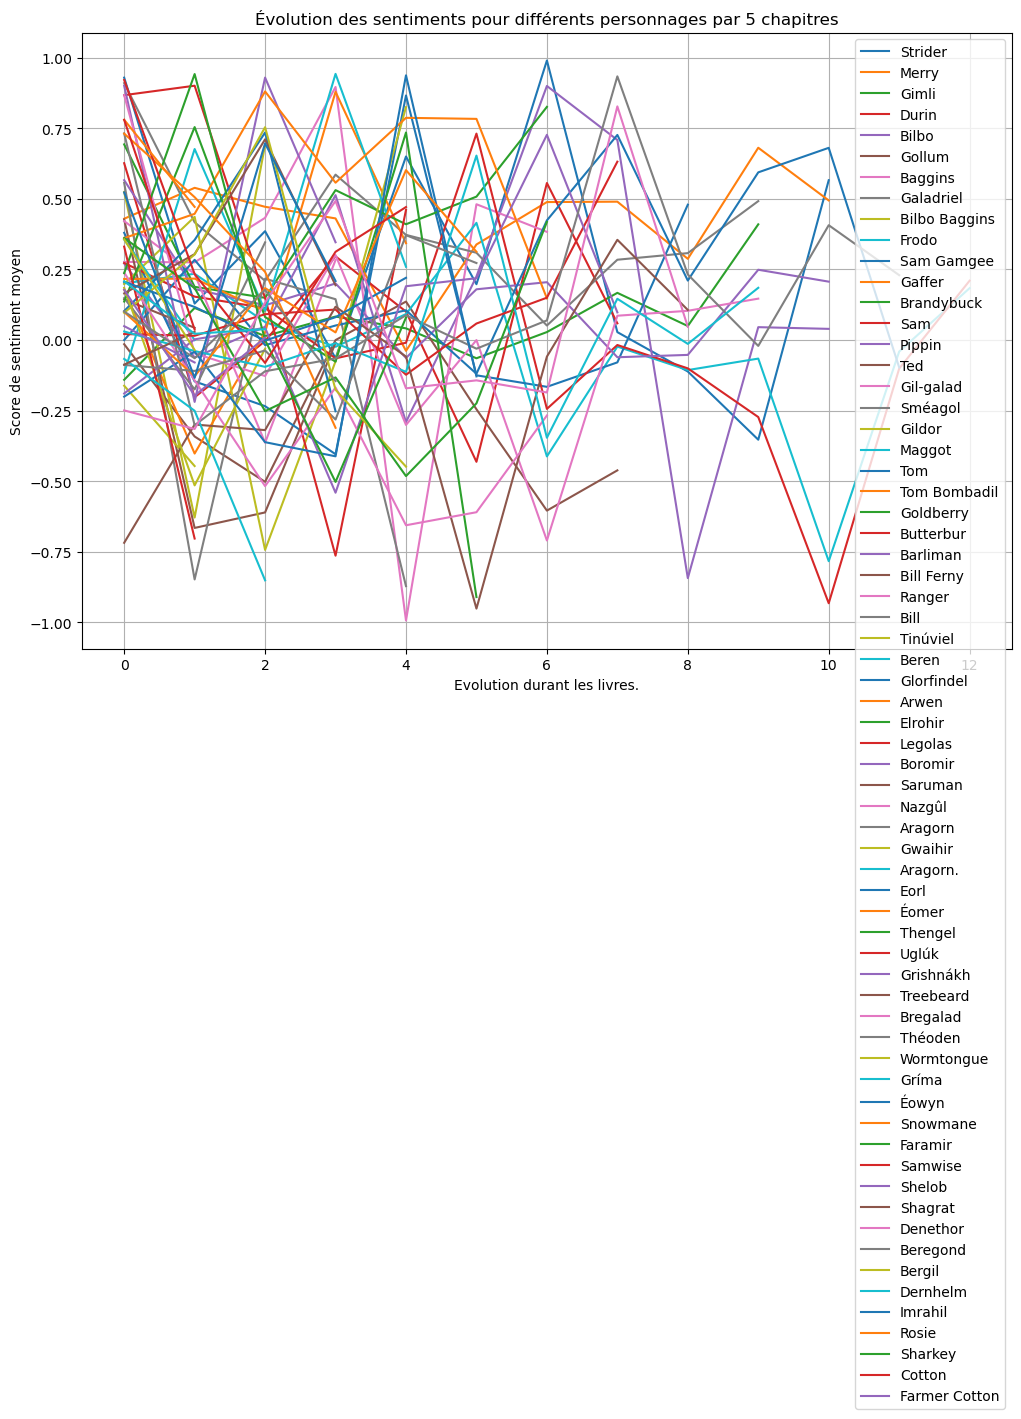

In [8]:
#même chose avec tout les peronnages du livre:

characters = ['Strider', 'Merry', 'Gimli', 'Durin', 'Bilbo', 'Gollum', 'Baggins', 'Galadriel', 'Bilbo Baggins', 'Frodo', 'Sam Gamgee', 'Gaffer', 'Brandybuck', 'Sam', 'Pippin', 'Ted', 'Gil-galad', 'Sméagol', 'Gildor', 'Maggot', 'Tom', 'Tom Bombadil', 'Goldberry', 'Butterbur', 'Barliman', 'Bill Ferny', 'Ranger', 'Bill', 'Tinúviel', 'Beren', 'Glorfindel', 'Arwen', 'Elrohir', 'Legolas', 'Boromir', 'Saruman', 'Nazgûl', 'Aragorn', 'Gwaihir', 'Aragorn.', 'Eorl', 'Éomer', 'Thengel', 'Uglúk', 'Grishnákh', 'Treebeard', 'Bregalad', 'Théoden', 'Wormtongue', 'Gríma', 'Éowyn', 'Snowmane', 'Faramir', 'Samwise', 'Shelob', 'Shagrat', 'Denethor', 'Beregond', 'Bergil', 'Dernhelm', 'Imrahil', 'Rosie', 'Sharkey', 'Cotton', 'Farmer Cotton']


plt.figure(figsize=(12, 8))

grouped_chapters = 5
num_groups = (len(chapters) + grouped_chapters - 1) // grouped_chapters

for character in characters:
    character_avg_sentiments = []

    for i in range(num_groups):
        start_chapter = i * grouped_chapters
        end_chapter = min((i + 1) * grouped_chapters, len(chapters))

        group_chapters = chapters[start_chapter:end_chapter]
        group_sentiments = [calculate_average_sentiment(character, chapter.split('\n'), sia) for chapter in group_chapters]

        
        valid_sentiments = [sentiment for sentiment in group_sentiments if sentiment is not None]

        if valid_sentiments:
            avg_group_sentiment = sum(valid_sentiments) / len(valid_sentiments)
            character_avg_sentiments.append(avg_group_sentiment)

    plt.plot(character_avg_sentiments, label=character)

plt.title("Évolution des sentiments pour différents personnages par 5 chapitres")
plt.xlabel("Evolution durant les livres.")
plt.ylabel("Score de sentiment moyen")
plt.grid(True)
plt.legend()
plt.show()